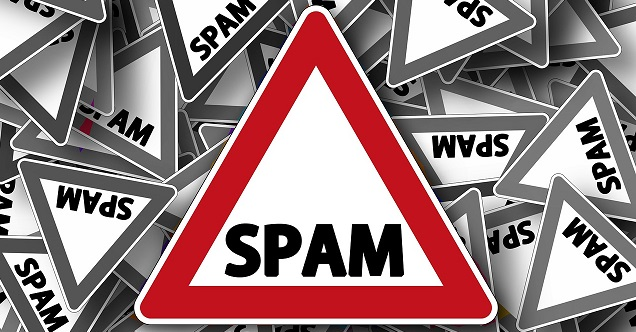

#Spam SMS detection

In this era of digital advertising, SMS ads are most common, but sometimes we don't need this type of unwanted ads. These unwanted ads are known as spam messages.

Spam messages are the most annoying thing in the present, so we need a solution to deal with these spam messages. In this model, I am going to build an ML model which classifies those messages into two categories: spam and not spam



In this project, our objective is to build a machine learning model based on SMS data. After model building, we will be able to detect spam and non-spam SMS messages.

The main constraints in this project are data cleaning and preprocessing. Since the dataset is small, we do not require high computational power. I will obtain the data from Kaggle

I will use accuracy and precision as evaluation metrics, with our main focus being accuracy. We prioritize accuracy because we aim to minimize false positives


.



### Importing important library

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk

Loading data

In [ ]:
# Mounts Google Drive to the  Colab session, allowing access to files stored on Google Drive.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path to the CSV file containing the data
path = '/content/drive/MyDrive/spam.csv'

# Reads the CSV file into a Pandas DataFrame,
data = pd.read_csv(path, encoding='latin-1')


In [ ]:

# Creates a Pandas DataFrame named 'df' using the data read from the CSV file.
df = pd.DataFrame(data)

In [ ]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:

print(df.shape)

(5572, 5)


###Data cleaning

In [ ]:
# Displays information about the DataFrame 'df', including the data types of each column and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#droping unwanted columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
# Renames the columns 'v1' and 'v2' to 'target' and 'text' respectively.
# The 'inplace=True' parameter ensures that the changes are made directly to the DataFrame 'df' without creating a copy.
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)


In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
encoder = LabelEncoder()

# Fit and transform the 'target' column
df['target'] = encoder.fit_transform(df['target'])


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Checks for missing values in each column of the DataFrame 'df' and calculates the sum of missing values.
df.isnull().sum()


target    0
text      0
dtype: int64

In [ ]:
# Counts the number of duplicate rows in the DataFrame 'df'.
df.duplicated().sum()


403

In [ ]:
# Removes duplicated rows from the DataFrame 'df', keeping only the first occurrence of each duplicated row.
df = df.drop_duplicates(keep='first')


In [ ]:
# Counts the number of duplicate rows after  Removes duplicated rows in the DataFrame 'df'
df.duplicated().sum()

0

###EDA



Ham vs spam

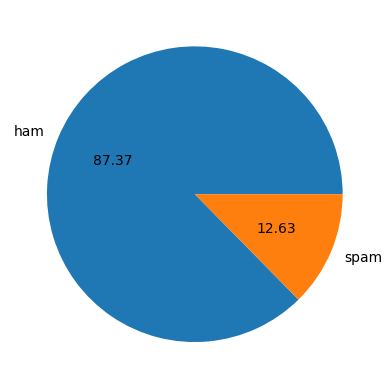

In [ ]:
# Creates a pie chart to visualize the distribution of the 'target' column in the DataFrame 'df'.


plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%.2f")
plt.show()


In [ ]:
!pip install nltk

In [ ]:
# Downloads the 'punkt' tokenizer from NLTK (Natural Language Toolkit) package.
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Adds a new column 'characters' to the DataFrame 'df' containing the number of characters in each text entry.
df['characters'] = df['text'].apply(len)


In [ ]:
# Adds a new column 'words_count' to the DataFrame 'df' containing the count of words in each text entry.
# Uses NLTK's word_tokenize function to tokenize each text entry into words and calculates the length of the resulting list.
df['words_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
# Adds a new column 'sentences_count' to the DataFrame 'df' containing the count of sentences in each text entry.
# Uses NLTK's sent_tokenize function to tokenize each text entry into sentences and calculates the length of the resulting list.
df['sentences_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [ ]:
df.head()

,target,text,characters,words_count,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Generates descriptive statistics for the columns 'characters', 'words_count', and 'sentences_count' in the DataFrame 'df'.
df[['characters', 'words_count', 'sentences_count']].describe()


,characters,words_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Generates descriptive statistics for the columns 'characters', 'words_count', and 'sentences_count For ham'

df[df['target'] == 0][['characters', 'words_count', 'sentences_count']].describe()


,characters,words_count,sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Generates descriptive statistics for the columns 'characters', 'words_count', and 'sentences_count For spam'
df[df['target']==1][['characters','words_count','sentences_count']].describe()

,characters,words_count,sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


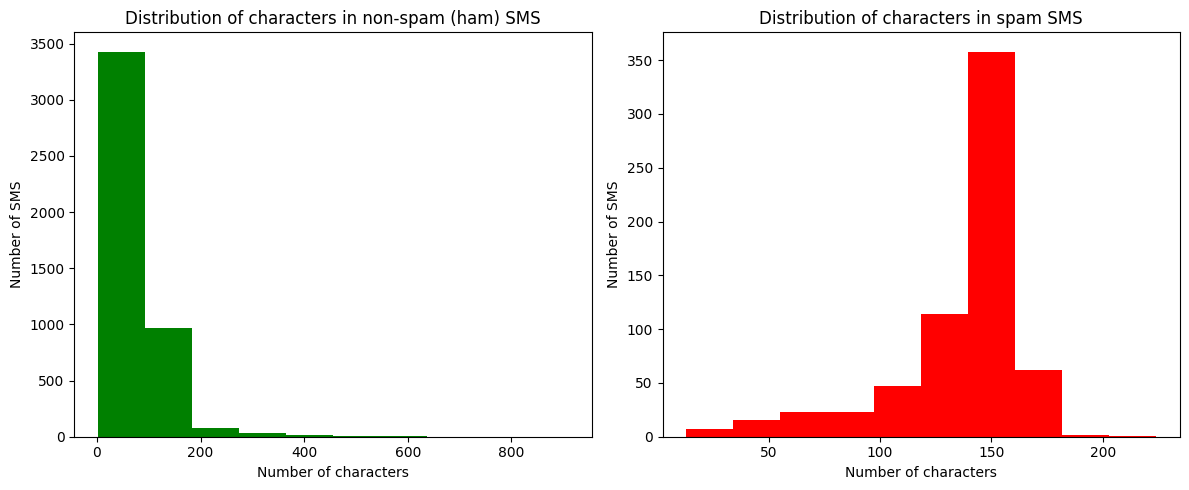

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for non-spam (ham) SMS
axs[0].hist(df[df['target'] == 0]['characters'], color='green')
axs[0].set_xlabel("Number of characters")
axs[0].set_ylabel("Number of SMS")
axs[0].set_title("Distribution of characters in non-spam (ham) SMS")

# Plot histogram for spam SMS
axs[1].hist(df[df['target'] == 1]['characters'], color='red')
axs[1].set_xlabel("Number of characters")
axs[1].set_ylabel("Number of SMS")
axs[1].set_title("Distribution of characters in spam SMS")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()





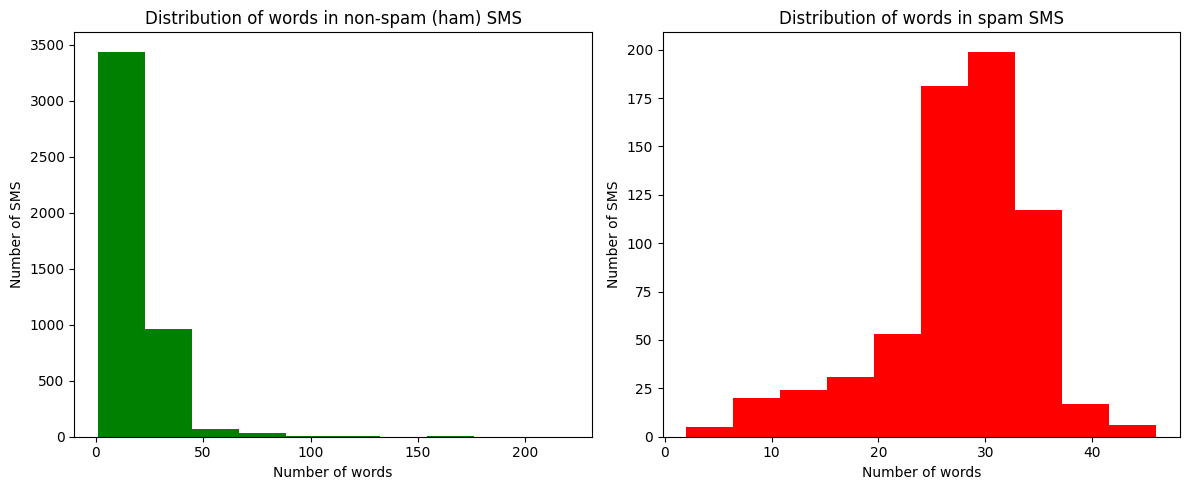

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for non-spam (ham) SMS
axs[0].hist(df[df['target'] == 0]['words_count'], color='green')
axs[0].set_xlabel("Number of words")
axs[0].set_ylabel("Number of SMS")
axs[0].set_title("Distribution of words in non-spam (ham) SMS")

# Plot histogram for spam SMS
axs[1].hist(df[df['target'] == 1]['words_count'], color='red')
axs[1].set_xlabel("Number of words")
axs[1].set_ylabel("Number of SMS")
axs[1].set_title("Distribution of words in spam SMS")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


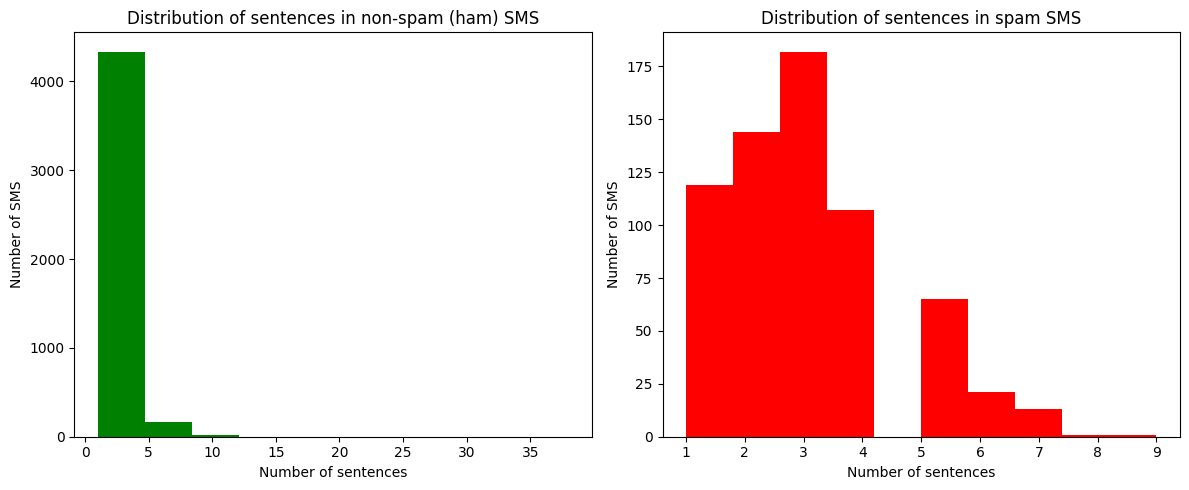

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for non-spam (ham) SMS
axs[0].hist(df[df['target'] == 0]['sentences_count'], color='green')
axs[0].set_xlabel("Number of sentences")
axs[0].set_ylabel("Number of SMS")
axs[0].set_title("Distribution of sentences in non-spam (ham) SMS")

# Plot histogram for spam SMS
axs[1].hist(df[df['target'] == 1]['sentences_count'], color='red')
axs[1].set_xlabel("Number of sentences")
axs[1].set_ylabel("Number of SMS")
axs[1].set_title("Distribution of sentences in spam SMS")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


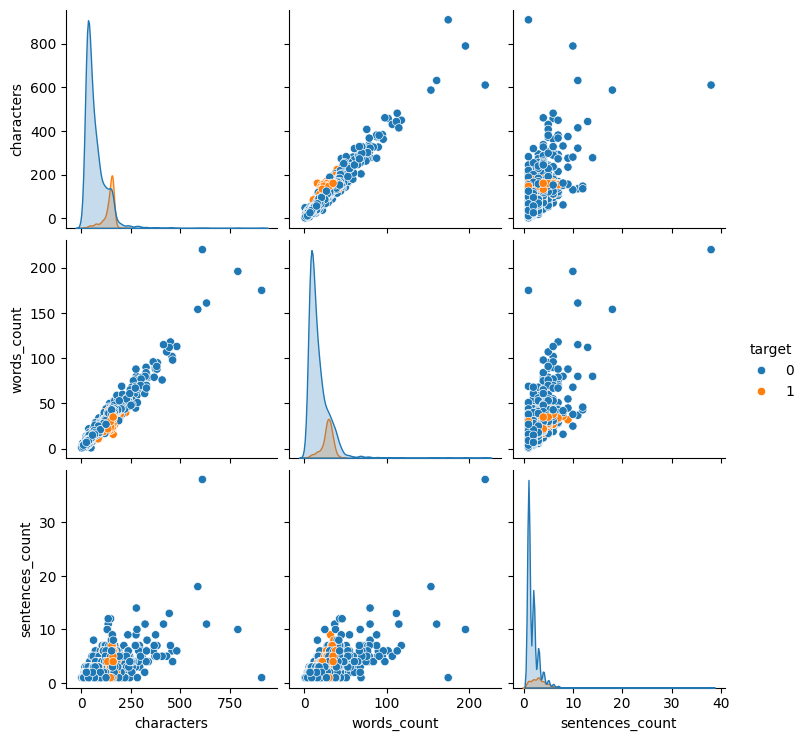

In [ ]:
# Generates a pairplot using Seaborn to visualize pairwise relationships between numerical variables in the DataFrame 'df'.
# The 'hue' parameter is set to 'target', which colors the data points based on the 'target' column.
sns.pairplot(df, hue='target')


<ipython-input-31-6b044df50a51>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


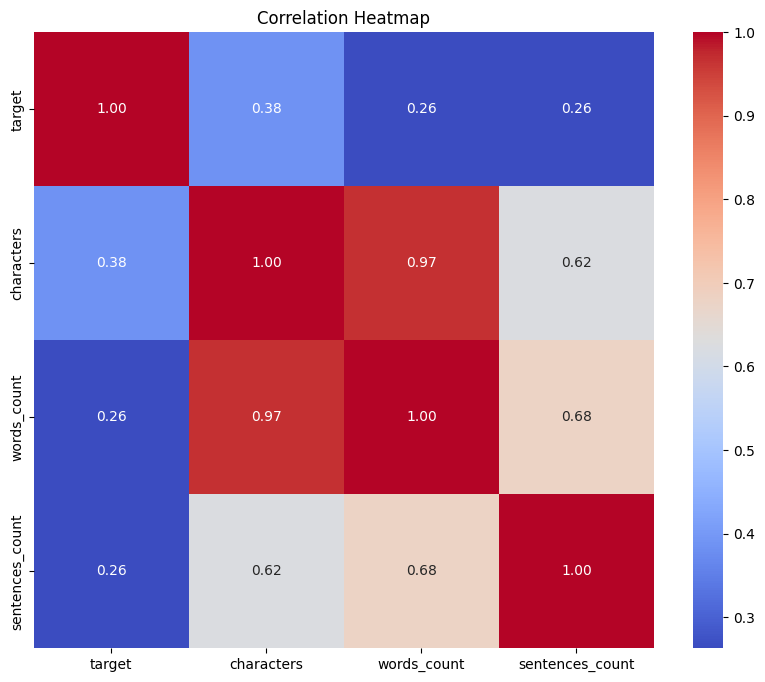

In [ ]:
# Computes the correlation matrix for numerical variables in the DataFrame 'df'.
corr = df.corr()

# Plot the correlation heatmap using Seaborn.
# The heatmap displays correlations between numerical variables, with annotations showing correlation values.
# The 'coolwarm' colormap is used to represent positive and negative correlations, and '.2f' format is used for annotations.
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Text processing**

steps -

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def TextProcessing(text):
    """
    Processes text for natural language processing tasks, incorporating lowercase conversion,
    alphanumeric filtering, stop word removal, and stemming.

    Args:
        text (str): The text to be processed.

    Returns:
        str: The processed text.
    """


    try:
        nltk.download('punkt')
        nltk.download('stopwords')
    except (LookupError, IOError):
        print("Warning: NLTK resources not found. Please download them using `nltk.download('punkt', 'stopwords')`.")

    # Preprocess text steps:
    # 1. Lowercase conversion
    text = text.lower()

    # 2. Tokenization and alphanumeric filtering
    tokens = nltk.word_tokenize(text)
    text = [token for token in tokens if token.isalnum()]

    # 3. Stop word removal
    stop_words = stopwords.words('english')
    text = [token for token in text if token not in stop_words]

    # 4. Stemming (optional)
    ps = PorterStemmer()
    stemmed_text = [ps.stem(token) for token in text]

    # 5. Return processed text
    return " ".join(stemmed_text)



In [ ]:
#  Applying TextProcessing{it is a function that performs text processing tasks}
df['transformed_text'] = df['text'].apply(TextProcessing)


Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading packa

In [ ]:
df.head()

,target,text,characters,words_count,sentences_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Import the WordCloud class from the wordcloud library.
from wordcloud import WordCloud

# Create a WordCloud object with specified width, height, and minimum font size.

wc = WordCloud(width=666, height=666, min_font_size=10)


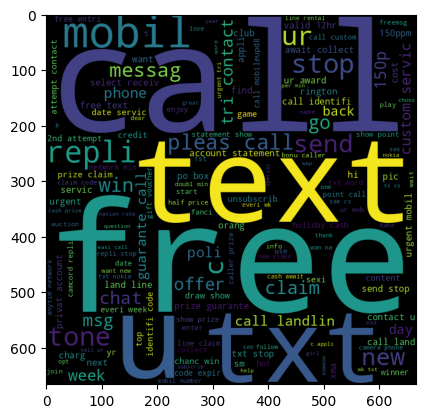

In [ ]:
# Generate a word cloud for 'spam' messages using the 'transformed_text' column.
# Concatenate all 'transformed_text' entries for 'spam' messages into a single string using str.cat(sep=" ").
# Generate the word cloud using the WordCloud object 'wc'.
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the word cloud using imshow().
plt.imshow(spam_wc)


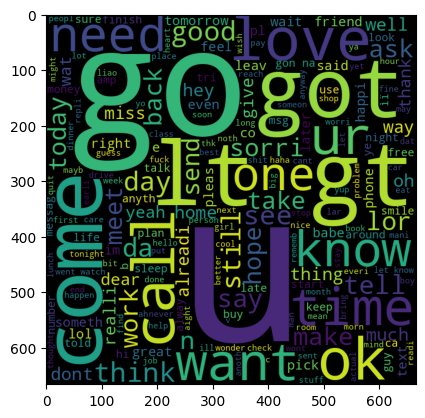

In [ ]:
# Generate a word cloud for 'ham' messages using the 'transformed_text' column.
spam_wc=  wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

###Model Implementationon

In [ ]:
# Import the CountVectorizer class from the sklearn.feature_extraction.text module.
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of the CountVectorizer class.
cv = CountVectorizer()


In [ ]:
# Use the CountVectorizer object 'cv' to transform the 'transformed_text' column of the DataFrame 'df'
# into a matrix of token counts, and then convert it to a dense array representation.


x=cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

Train Test spliting

In [ ]:
# Import the train_test_split function from the sklearn.model_selection module.
from sklearn.model_selection import train_test_split


In [ ]:
# Split the features (x) and the target (y) into training and testing sets.
# The test_size parameter specifies the proportion of the dataset to include in the test split.
# The random_state parameter ensures reproducibility of the split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Import classifiers from scikit-learn and XGBoost for building and evaluating machine learning models.
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
# Instantiate different classifiers with specific configurations for building machine learning models.
mnb = MultinomialNB()  # Multinomial Naive Bayes classifier
gnb = GaussianNB()  # Gaussian Naive Bayes classifier
bnb = BernoulliNB()  # Bernoulli Naive Bayes classifier
svc = SVC(kernel='sigmoid', gamma=1.0)  # Support Vector Classifier with sigmoid kernel
knc = KNeighborsClassifier()  # K-Nearest Neighbors classifier
dtc = DecisionTreeClassifier(max_depth=5)  # Decision Tree classifier with maximum depth of 5
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # Logistic Regression classifier with L1 penalty
rfc = RandomForestClassifier(n_estimators=50, random_state=2)  # Random Forest classifier with 50 estimators
abc = AdaBoostClassifier(n_estimators=50, random_state=2)  # AdaBoost classifier with 50 estimators
bc = BaggingClassifier(n_estimators=50, random_state=2)  # Bagging classifier with 50 estimators
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)  # Extra Trees classifier with 50 estimators
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)  # Gradient Boosting Decision Tree classifier with 50 estimators
xgb = XGBClassifier(n_estimators=50, random_state=2)  # XGBoost classifier with 50 estimators


In [ ]:
# Create a dictionary 'clfs' that maps classifier names to their corresponding instantiated objects.
clfs = {
    'mnb': mnb,  # Multinomial Naive Bayes classifier
    'gnb': gnb,  # Gaussian Naive Bayes classifier
    'bnb': bnb,  # Bernoulli Naive Bayes classifier
    'SVC': svc,  # Support Vector Classifier with sigmoid kernel
    'KN': knc,   # K-Nearest Neighbors classifier
    'NB': mnb,   # Repeated entry for Multinomial Naive Bayes classifier (possible duplicate)
    'DT': dtc,   # Decision Tree classifier with maximum depth of 5
    'LR': lrc,   # Logistic Regression classifier with L1 penalty
    'RF': rfc,   # Random Forest classifier with 50 estimators
    'AdaBoost': abc,  # AdaBoost classifier with 50 estimators
    'BgC': bc,   # Bagging classifier with 50 estimators
    'ETC': etc,  # Extra Trees classifier with 50 estimators
    'GBDT': gbdt,  # Gradient Boosting Decision Tree classifier with 50 estimators
    'xgb': xgb   # XGBoost classifier with 50 estimators
}


In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [ ]:
# Lists to store accuracy and precision scores for each classifier
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)




For  mnb
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  gnb
Accuracy -  0.8800773694390716
Precision -  0.5315315315315315
For  bnb
Accuracy -  0.9700193423597679
Precision -  0.9734513274336283
For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [ ]:
# Create a DataFrame to store the performance metrics (accuracy and precision) for each classifier.
# Sort the DataFrame based on precision scores in descending order.
performance = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)


In [ ]:
performance

,Algorithm,Accuracy,Precision
4,KN,0.906190,1.000000
8,RF,0.971954,1.000000
11,ETC,0.976789,0.991379
7,LR,0.970986,0.973684
2,bnb,0.970019,0.973451
13,xgb,0.973888,0.966387
9,AdaBoost,0.963250,0.946429
12,GBDT,0.943907,0.944444
6,DT,0.924565,0.916667
10,BgC,0.962282,0.915966


In [ ]:
# Import required classifiers and the VotingClassifier
from sklearn.ensemble import VotingClassifier


# Instantiate base classifiers with specific configurations
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Instantiate the VotingClassifier with specified base estimators and voting strategy
voting = VotingClassifier(estimators=[('rf', rfc), ('et', etc)], voting='soft')

# Train the VotingClassifier on the training data
voting.fit(x_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
# Predict labels for the test set using the trained VotingClassifier
y_pred = voting.predict(x_test)

# Calculate and print the accuracy and precision scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9748549323017408
Precision: 1.0


According to the scores, the VotingClassifier performed the best. Therefore, I will use the VotingClassifier as the model. The VotingClassifier combines multiple models to make predictions. in my case these are (rf and et)

In [ ]:
import pickle

In [ ]:

# File path for the vectorizer pickle file
vectorizer = '/content/drive/MyDrive/Colab Notebooks/vectorizer.pkl'

# File path for the machine learning model
ml_model = '/content/drive/MyDrive/Colab Notebooks/ml_model'


In [ ]:
# Save the CountVectorizer object 'cv' to a file using pickle
pickle.dump(cv, open(vectorizer, 'wb'))

# Save the VotingClassifier object 'voting' to a file using pickle
pickle.dump(voting, open(ml_model, 'wb'))


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_path = '/content/drive/MyDrive/Colab Notebooks/vectorizer.pkl'
model_path = '/content/drive/MyDrive/Colab Notebooks/ml_model'

# Load the saved vectorizer and model
with open(vectorizer_path, 'rb') as f:
    vectorizer = pickle.load(f)

with open(model_path, 'rb') as f:
    model = pickle.load(f)




# Sample input data
input_data = ["Congratulations! You've won a free vacation to an exotic island! Click the link below to claim your prize now!"]

# Preprocess your input data using the loaded vectorizer
X = vectorizer.transform(input_data)

predictions = model.predict(X)

# Print the predictions
if predictions == 1:
  print("spam")
else:
  print("not spam")



spam
